**Importing Libraries**

In [ ]:
import numpy as np #used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
import matplotlib.pyplot as plt
import os
import torch
from tensorflow import keras
from tensorflow.keras.datasets import mnist #mnist dataser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers #A Layer consists of a tensor - in tensor - out computation function
from tensorflow.keras.layers import Dense , Flatten
# Faltten - used fot flattening the input or change the dimension
# Dense - Dense Layer is the regular deeply connected in 
from tensorflow.keras.layers import Conv2D , MaxPool2D , Dropout  # conv2d -Convolutional Layer
from tensorflow.keras.optimizers import Adam   #optimizer
from keras.utils import np_utils #used for one - hot encoding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/gdrive/MyDrive

ls: cannot access '/content/gdrive/MyDrive': Transport endpoint is not connected


**Getting Data and Pre Process it**

In [ ]:
(x_train , y_train),(x_test , y_test) = mnist.load_data() #x contains the images and y has its label, like if its the image of 1 then its label will be 1.
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

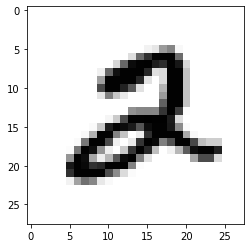

In [ ]:
plt.imshow(x_train[5] , cmap = "binary")

In [ ]:
# Pre Process the images

#Normalizing the imaeges to [0,1] range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

#expand the dimensions of the images to (28,28,1)[we use 1 here bcoz the image we take is binary]
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape , x_test.shape

(60000, 28, 28, 1)

In [ ]:
#one hot encoding
#[1 will be prensent in the array if that particular image has that value.ex. in 2nd row the second image has value 0 so 1 is present in 0th position]

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

**Model Building**

In [ ]:
model = Sequential() #INITIALIZE

model.add(Conv2D(32, (3,3), input_shape = (28,28,1) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Conv2D(64, (3,3) , activation = "relu"))#(3,3) is the kernal size
model.add(MaxPool2D((2,2))) # (2,2) isthe pool size

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))#dense is used for classification and 10(numbers from 0-9) is the num of layers.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [ ]:
#callbacks

#EarlyStopping

es = EarlyStopping(monitor = "val_acc", min_delta= 0.01, patience = 5 , verbose= 1)
 
 #Model Checpoint

mc = ModelCheckpoint('./bestmodel.h5' , monitor = "val_acc", verbose = 1, save_best_only = True)
 
cb = [es,mc] 

**Model Training**

In [ ]:
his = model.fit(x_train,y_train, epochs = 50, validation_split = 0.3,callbacks = cb)

Epoch 1/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9986

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0623 - val_accuracy: 0.9902
Epoch 2/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9990

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0635 - val_accuracy: 0.9906
Epoch 3/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9984

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0626 - val_accuracy: 0.9903
Epoch 4/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9982

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0050 - accuracy: 0.9982 - val_loss: 0.0600 - val_accuracy: 0.9912
Epoch 5/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0646 - val_accuracy: 0.9906
Epoch 6/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9985

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0617 - val_accuracy: 0.9904
Epoch 7/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0697 - val_accuracy: 0.9904
Epoch 8/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9984

1313/1313 [==============================] - 42s 32ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.0658 - val_accuracy: 0.9898
Epoch 9/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9985

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0622 - val_accuracy: 0.9909
Epoch 10/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0611 - val_accuracy: 0.9914
Epoch 11/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9985

1313/1313 [==============================] - 41s 31ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0683 - val_accuracy: 0.9903
Epoch 12/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9981

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0602 - val_accuracy: 0.9908
Epoch 13/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0620 - val_accuracy: 0.9908
Epoch 14/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0628 - val_accuracy: 0.9915
Epoch 15/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9989

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0619 - val_accuracy: 0.9909
Epoch 16/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0698 - val_accuracy: 0.9918
Epoch 17/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9984

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.0675 - val_accuracy: 0.9906
Epoch 18/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9988

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0693 - val_accuracy: 0.9898
Epoch 19/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9985

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0617 - val_accuracy: 0.9906
Epoch 20/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9988

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0631 - val_accuracy: 0.9910
Epoch 21/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9986

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.0649 - val_accuracy: 0.9909
Epoch 22/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9985

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0682 - val_accuracy: 0.9907
Epoch 23/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9990

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0728 - val_accuracy: 0.9903
Epoch 24/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9988

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0667 - val_accuracy: 0.9907
Epoch 25/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9987

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0717 - val_accuracy: 0.9902
Epoch 26/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9986

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0037 - accuracy: 0.9986 - val_loss: 0.0654 - val_accuracy: 0.9916
Epoch 27/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9986

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.0686 - val_accuracy: 0.9911
Epoch 28/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0671 - val_accuracy: 0.9903
Epoch 29/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9990

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0688 - val_accuracy: 0.9909
Epoch 30/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0707 - val_accuracy: 0.9912
Epoch 31/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0795 - val_accuracy: 0.9897
Epoch 32/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9985

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0734 - val_accuracy: 0.9902
Epoch 33/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9989

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0674 - val_accuracy: 0.9909
Epoch 34/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0734 - val_accuracy: 0.9901
Epoch 35/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0708 - val_accuracy: 0.9898
Epoch 36/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0687 - val_accuracy: 0.9901
Epoch 37/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0706 - val_accuracy: 0.9903
Epoch 38/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9989

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0726 - val_accuracy: 0.9911
Epoch 39/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9995

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0699 - val_accuracy: 0.9916
Epoch 40/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9990

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0759 - val_accuracy: 0.9903
Epoch 41/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9986

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0704 - val_accuracy: 0.9904
Epoch 42/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0712 - val_accuracy: 0.9912
Epoch 43/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9987

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0747 - val_accuracy: 0.9898
Epoch 44/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9991

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0858 - val_accuracy: 0.9902
Epoch 45/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9987

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0790 - val_accuracy: 0.9901
Epoch 46/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9990

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0738 - val_accuracy: 0.9907
Epoch 47/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9990

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0694 - val_accuracy: 0.9907
Epoch 48/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0814 - val_accuracy: 0.9899
Epoch 49/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9990

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0682 - val_accuracy: 0.9911
Epoch 50/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0905 - val_accuracy: 0.9894


In [ ]:
#save the model

model_s = keras.models.load_model("/content/digitreg.h5")
#model.save("digitreg.h5")
#model_path = "/content/digitreg.h5"

In [ ]:
#model evalutaion/ accuracy

score = model_s.evaluate(x_test, y_test)
print(f"the model accuracy is {score[1]} ")
print(f"the model loss is {score[0]} ")

313/313 [==============================] - 3s 8ms/step - loss: 161.0015 - accuracy: 0.9272
the model accuracy is 0.9272000193595886 
the model loss is 161.00149536132812 
